# Which Teams are Failing to Meet Expectations?

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np

from PIL import Image
import urllib
import json
import os

In [31]:
font_path = "../Grafici/assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("../Grafici/assets/stylesheets/soc_base.mplstyle")

## The data

Here we read 538's predictions and compute the expected point tally of each side, using the pre-match probabilities assigned by 538.

In [32]:
df = pd.read_csv("../FiveThirtyEight/soccer-spi/19-03/spi_matches.csv", sep=",", decimal=".")
df = df[(data.league=='Italy Serie A') & (data.season >= 2022) ]

Custom function to compute points across teams.

In [33]:
def compute_points(x,y):
    '''
    This function computed the points achieved by each side.
    '''
    if x > y:
        return 3
    if x == y:
        return 1
    else:
        return 0

In [34]:
df['xpoints1'] = df['prob1']*3 + df['probtie']
df['xpoints2'] = df['prob2']*3 + df['probtie']
df['points1'] = [compute_points(x,y) for x,y in zip(df['score1'], df['score2'])]
df['points2'] = [compute_points(y,x) for x,y in zip(df['score1'], df['score2'])]
df

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,xpoints1,xpoints2,points1,points2
56895,2022,2022-08-13,1854,Italy Serie A,AC Milan,Udinese,78.31,57.94,0.6751,0.1206,...,2.53,0.48,0.99,1.30,4.20,2.10,2.2296,0.5661,3,0
56897,2022,2022-08-13,1854,Italy Serie A,Sampdoria,Atalanta,52.95,73.01,0.2101,0.5546,...,0.56,2.01,1.40,1.21,0.00,1.58,0.8656,1.8991,0,3
56920,2022,2022-08-13,1854,Italy Serie A,Lecce,Internazionale,50.41,82.17,0.1144,0.6995,...,0.64,2.43,0.70,2.38,1.05,2.10,0.5292,2.2845,0,3
56922,2022,2022-08-13,1854,Italy Serie A,Monza,Torino,52.84,62.83,0.3254,0.3833,...,1.15,2.29,0.84,0.79,1.05,2.10,1.2675,1.4412,0,3
57017,2022,2022-08-14,1854,Italy Serie A,Fiorentina,Cremonese,67.61,49.25,0.6184,0.1450,...,2.14,1.67,3.01,0.79,2.94,2.10,2.0917,0.6715,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67119,2022,2023-06-03,1854,Italy Serie A,Atalanta,Monza,71.42,56.83,0.5836,0.1824,...,NaN,NaN,NaN,NaN,NaN,NaN,1.9849,0.7813,0,0
67120,2022,2023-06-03,1854,Italy Serie A,Empoli,Lazio,50.06,67.52,0.2596,0.4610,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0582,1.6624,0,0
67121,2022,2023-06-03,1854,Italy Serie A,Udinese,Juventus,64.87,75.76,0.3064,0.4302,...,NaN,NaN,NaN,NaN,NaN,NaN,1.1826,1.5540,0,0
67122,2022,2023-06-03,1854,Italy Serie A,AC Milan,Verona,71.93,53.95,0.6138,0.1545,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0731,0.6952,0,0


In [35]:
df_team1 = df[['team1', 'xpoints1', 'points1']]
df_team2 = df[['team2', 'xpoints2', 'points2']]
df_team1.columns = ['team', 'xpoints', 'points']
df_team2.columns = ['team', 'xpoints', 'points']
df_g = (
    pd.concat([df_team1, df_team2])
    .groupby(['team']).sum()
    .reset_index()
    .assign(difference = lambda x: x.points - x.xpoints)
)
df_g.sort_values(by='difference')

,team,xpoints,points,difference
19,Verona,44.9844,19,-25.9844
7,Internazionale,74.6698,50,-24.6698
4,Cremonese,37.1269,13,-24.1269
6,Fiorentina,59.4244,37,-22.4244
14,Sampdoria,37.4162,15,-22.4162
0,AC Milan,69.9576,48,-21.9576
2,Atalanta,64.7586,45,-19.7586
1,AS Roma,66.5256,47,-19.5256
18,Udinese,52.3381,38,-14.3381
17,Torino,50.9511,37,-13.9511


For the logos, we need to do some manual labour and get the team's Fotmob ID.

In [36]:

team_map = {
    'team': [
        "Napoli",
        "Lazio",
        "Juventus",
        "Inter",
        "Atalanta",
        "AC Milan",
        "Roma",
        "Fiorentina",
        "Bologna",
        "Monza",
        "Torino",
        "Sassuolo",
        "Udinese",
        "Salernitana",
        "Empoli",
        "Lecce",
        "Verona",
        "Spezia",
        "Cremonese",
        "Sampdoria"
    ],
    'fotmob_id':[
        9875,
        8543,
        9885,
        8636,
        8524,
        8564,
        8686,
        8535,
        9857,
        6504,
        9804,
        7943,
        8600,
        6480,
        8534,
        9888,
        9876,
        9881,
        7801,
        9882
    ],
}

team_map = pd.DataFrame(team_map)
team_map

,team,fotmob_id
0,Napoli,9875
1,Lazio,8543
2,Juventus,9885
3,Inter,8636
4,Atalanta,8524
5,AC Milan,8564
6,Roma,8686
7,Fiorentina,8535
8,Bologna,9857
9,Monza,6504


In [37]:
df_g = pd.merge(df_g, team_map)
df_g

,team,xpoints,points,difference,fotmob_id
0,AC Milan,69.9576,48,-21.9576,8564
1,Atalanta,64.7586,45,-19.7586,8524
2,Bologna,44.7152,37,-7.7152,9857
3,Cremonese,37.1269,13,-24.1269,7801
4,Empoli,37.9162,28,-9.9162,8534
5,Fiorentina,59.4244,37,-22.4244,8535
6,Juventus,63.6812,56,-7.6812,9885
7,Lazio,59.8936,52,-7.8936,8543
8,Lecce,40.2906,27,-13.2906,9888
9,Monza,42.0943,34,-8.0943,6504


Finally, we create a function that takes the timeline of this xPoints and actual points so we can plot a time series.

In [49]:
def get_cumpoints_df(team, data = df):

    df = data.copy()
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    is_in_home = df[(df['team1'] == team)][['team1', 'points1', 'xpoints1', 'date']].reset_index(drop=True)
    is_in_away = df[(df['team2'] == team)][['team2', 'points2', 'xpoints2', 'date']].reset_index(drop=True)
    is_in_home.columns = ['team', 'points', 'xpoints', 'date']
    is_in_away.columns = ['team', 'points', 'xpoints', 'date']
    df = pd.concat([is_in_home, is_in_away]).sort_values(by='date', ascending=True).reset_index(drop=True)
    df['cum_points'] = df['points'].cumsum()
    df['cum_xpoints'] = df['xpoints'].cumsum()
    return df

# Check to see if it works
get_cumpoints_df('Bologna')

,team,points,xpoints,date,cum_points,cum_xpoints
0,Bologna,0,0.7555,2022-08-14,0,0.7555
1,Bologna,1,1.4545,2022-08-21,1,2.2100
2,Bologna,0,0.5068,2022-08-27,1,2.7168
3,Bologna,1,1.7302,2022-09-01,2,4.4470
4,Bologna,1,1.3993,2022-09-04,3,5.8463
5,Bologna,3,1.1405,2022-09-11,6,6.9868
6,Bologna,0,1.6458,2022-09-17,6,8.6326
7,Bologna,0,0.8562,2022-10-02,6,9.4888
8,Bologna,1,1.5899,2022-10-08,7,11.0787
9,Bologna,0,0.3341,2022-10-16,7,11.4128


## The Visual

In [53]:
def plot_point_difference(ax, team, label_y = False, data=df):
    ax.grid(ls='--', color='lightgrey')
    for spine in ax.spines.values():
        spine.set_edgecolor('lightgrey')
        spine.set_linestyle('dashed')
    ax.tick_params(color='lightgrey', labelsize=8, labelcolor='grey')
    test_df = get_cumpoints_df(team, data)

    ax.plot(test_df.index + 1, test_df['cum_points'], marker='o', mfc='white', ms=5, color='#287271')
    ax.plot(test_df.index + 1, test_df['cum_xpoints'], marker='o', mfc='white', ms=5, color='#D81159')
    ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
    ax.set_ylim(-1,80)
    ax.set_xlim(0.25)
    ax.set_xticklabels([])
    mid_point = test_df['cum_points'].iloc[-1] + (test_df['cum_xpoints'].iloc[-1] - test_df['cum_points'].iloc[-1])/2
    difference = test_df['cum_points'].iloc[-1] - test_df['cum_xpoints'].iloc[-1]
    text_ = ax.annotate(
        xy=(ax.get_xlim()[1], mid_point),
        text=f'{difference:.1f}',
        xytext=(-5,0),
        ha='center',
        va='center',
        color='#D81159',
        weight='bold',
        size=7,
        textcoords='offset points'
    )
    text_.set_path_effects(
        [path_effects.Stroke(linewidth=1.5, foreground='white'), path_effects.Normal()]
    )
    # ----------------------------------------------------------------
    if label_y:
        ax.set_ylabel('Points', color='grey', size=8)
    else:
        ax.set_yticklabels([])

FileNotFoundError: [Errno 2] No such file or directory: 'figures/10032022_underperformers.png'

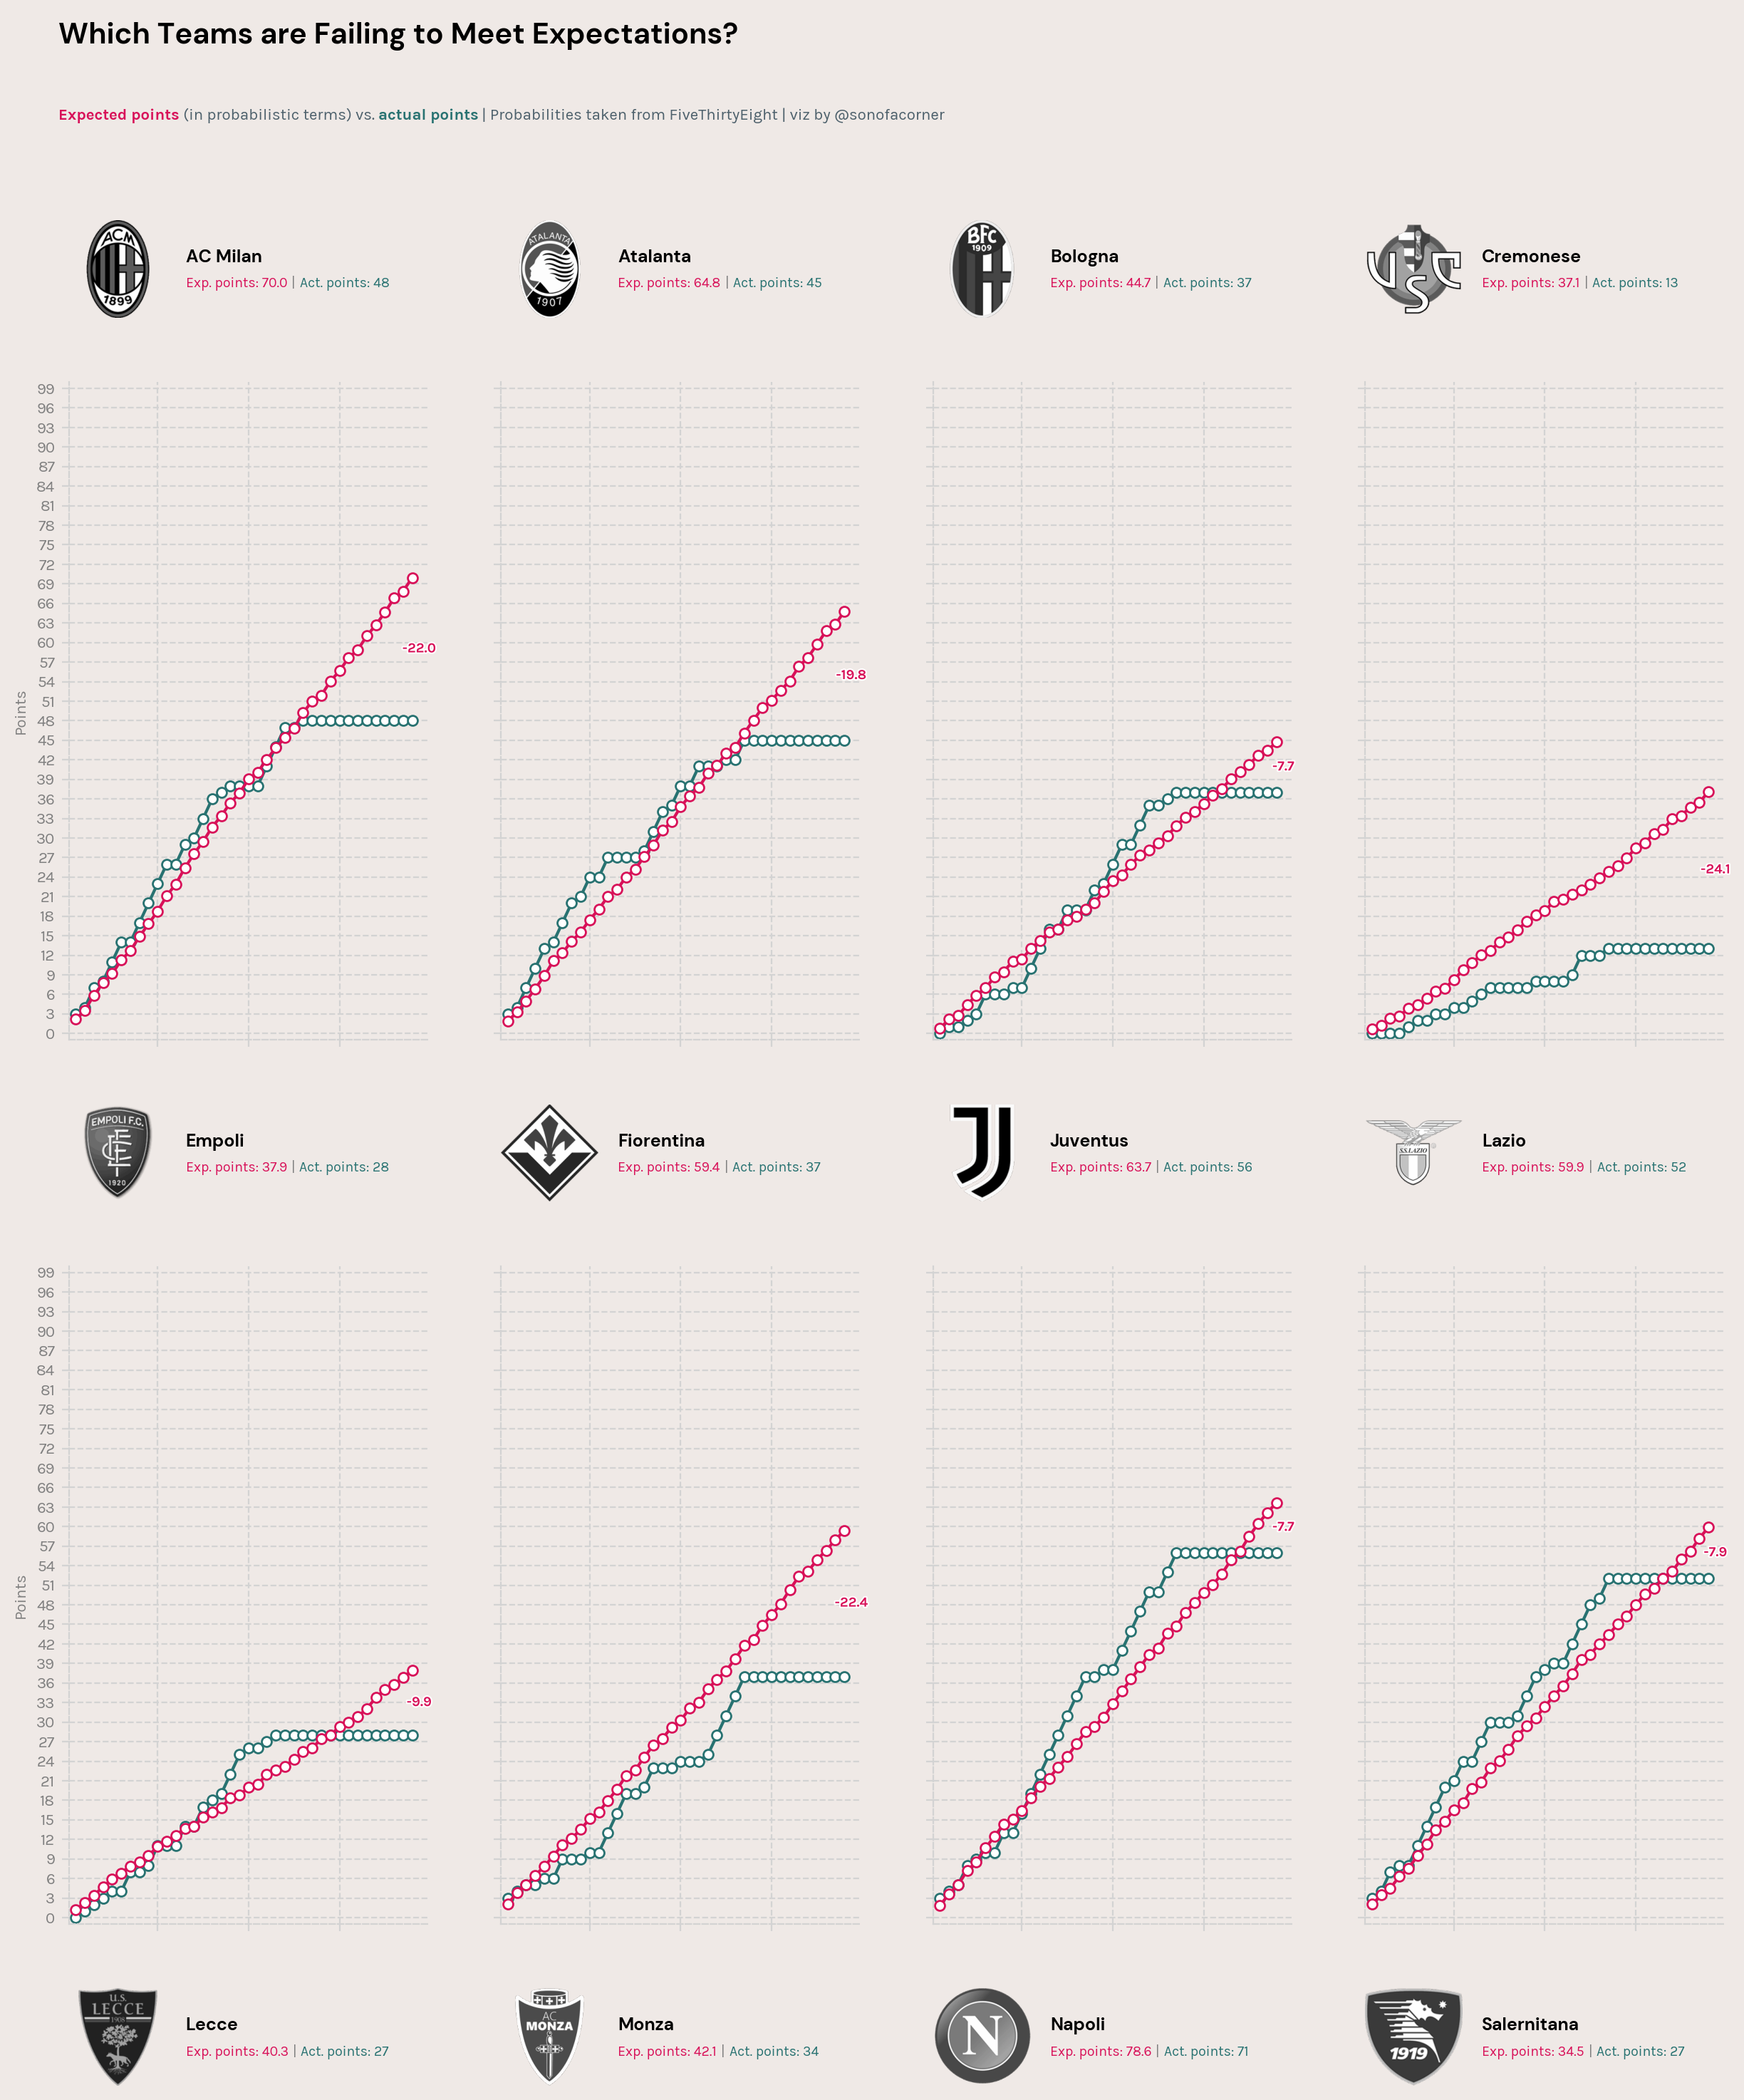

In [52]:
fig = plt.figure(figsize=(15, 17), dpi = 200)
nrows = 5
ncols = 4
gspec = gridspec.GridSpec(
    ncols=ncols, nrows=nrows, figure=fig, 
    height_ratios = [(1/nrows)*2.6 if x % 2 != 0 else (1/nrows)/2.6 for x in range(nrows)], hspace=0.2
)

plot_counter = 0
logo_counter = 0
for row in range(nrows):
    for col in range(ncols):
        if row % 2 != 0:
            ax = plt.subplot(
                gspec[row, col],
                facecolor = "#EFE9E6"
            )
            team = df_g['team'].iloc[plot_counter]
            if col == 0:
                label_y = True
            else:
                label_y = False
            
            plot_point_difference(ax, team, label_y)           
            plot_counter += 1
        else:
            teamId = df_g['fotmob_id'].iloc[logo_counter]
            teamName = df_g['team'].iloc[logo_counter]
            xpoints = df_g['xpoints'].iloc[logo_counter]
            apoints = df_g['points'].iloc[logo_counter]
            fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
            logo_ax = plt.subplot(
                gspec[row,col],
                anchor = 'NW', facecolor = '#EFE9E6'
            )
            club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{teamId:.0f}.png')).convert('LA')
            logo_ax.imshow(club_icon)
            logo_ax.axis('off')
            # -- Add the team name
            ax_text(
                x = 1.2, 
                y = 0.7,
                s = f'<{teamName}>\n<Exp. points: {xpoints:.1f}> <|> <Act. points: {apoints:.0f}>',
                ax = logo_ax, 
                highlight_textprops=[{'weight':'bold', 'font':'DM Sans'},{'size':'7', 'color': '#D81159'}, {'size':'7', 'color': 'grey'}, {'size':'7', 'color': '#287271'}],
                font = 'Karla', 
                ha = 'left', 
                size = 9, 
                annotationbbox_kw = {'xycoords':'axes fraction'}
            )
            logo_counter += 1

fig_text(
    x=0.12, y=.95, 
    s='Which Teams are Failing to Meet Expectations?',
    va='bottom', ha='left',
    fontsize=15, color='black', font='DM Sans', weight='bold'
)
fig_text(
	x=0.12, y=.92, 
    s='<Expected points> (in probabilistic terms) vs. <actual points> | Probabilities taken from FiveThirtyEight | viz by @sonofacorner',
    highlight_textprops=[{'weight':'bold', 'color': '#D81159'}, {'weight':'bold', 'color': '#287271'}],
	va='bottom', ha='left',
	fontsize=8, color='#4E616C', font='Karla'
)

plt.savefig(
	"figures/10032022_underperformers.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"figures/10032022_underperformers_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)